In [58]:
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score
import nltk
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import numpy as np
from tqdm.notebook import trange, tqdm
from sklearn.feature_extraction.text import CountVectorizer
import random
from random import sample

In [59]:
pre_load = pd.read_csv('spam_or_not_spam.csv')

In [66]:
data = pre_load.sample(frac=1) # shuffle dataset

In [67]:
data.head(5)

,email,label
299,begin forwarded text date sat NUMBER aug NUMB...,0
2746,mr martin francis abidjan cote d ivoire west a...,1
2966,NaN,1
140,url URL date not supplied a nintendo newslette...,0
806,URL,0


In [68]:
data.describe()

,label
count,3000.000000
mean,0.166667
std,0.372740
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [69]:
data = data.dropna()

In [70]:
print(type(data['label']))

<class 'pandas.core.series.Series'>


In [71]:
english_stopwords = set(stopwords.words('english'))
punc_set = set(string.punctuation)
punc_set.add("``")
ps = PorterStemmer()
def preprocess_email(text):
    preprocessed_tokens = []
    text = text.lower()
    tokens = word_tokenize(text)

    tokens = word_tokenize(text)
    for tok in tokens:
        if tok in english_stopwords or tok == " " or tok in punc_set:
            continue
        tok = re.sub(r"\d+", "NUMBER", tok)
        ps.stem(tok)
        preprocessed_tokens.append(tok)

    return " ".join(preprocessed_tokens)

In [72]:
data['processed_email'] = data['email'].apply(preprocess_email)

In [74]:
data.head(-10)

,email,label,processed_email
299,begin forwarded text date sat NUMBER aug NUMB...,0,begin forwarded text date sat number aug numbe...
2746,mr martin francis abidjan cote d ivoire west a...,1,mr martin francis abidjan cote ivoire west afr...
140,url URL date not supplied a nintendo newslette...,0,url url date supplied nintendo newsletter numb...
806,URL,0,url
2878,NUMBER claim your NUMBER kmart gift card URL N...,1,number claim number kmart gift card url number...
...,...,...,...
2723,dear sir my name is dr steven m duba the son o...,1,dear sir name dr steven duba son mr theo duba ...
1485,justin mason jm jmason org writes hmm also i t...,0,justin mason jm jmason org writes hmm also thi...
917,on fri NUMBER aug NUMBER robert harley wrote i...,0,fri number aug number robert harley wrote amus...
1031,halloechen i have requires saxon NUMBER NUMBER...,0,halloechen requires saxon number number number...


Most Common word

In [75]:
spam_corpus = [] # spam
for msg in data[data['label'] == 1]['processed_email'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


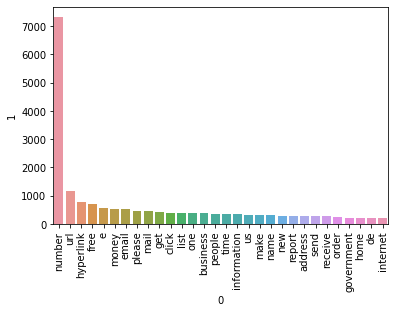

In [76]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1]) 
plt.xticks(rotation='vertical')
plt.show()

In [77]:
#issues will address in Word docx

In [78]:
wc_spam = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', 
               collocations=False).generate(data[data['label'] == 1]['processed_email'].str.cat(sep=" "))

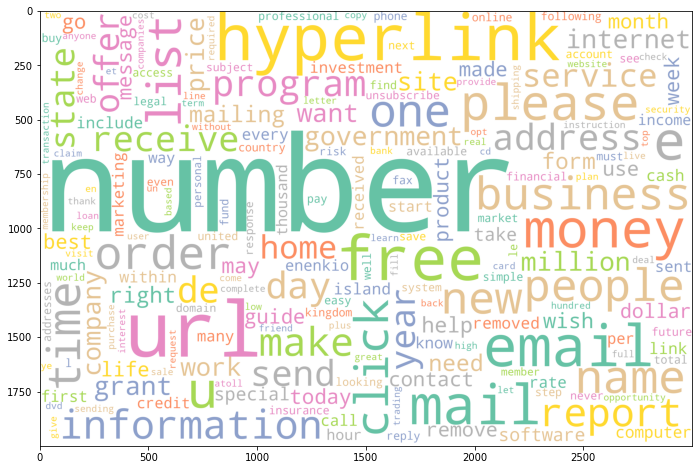

In [79]:
plt.figure(figsize=(15,8))
plt.imshow(wc_spam)

In [80]:
ham_corpus = [] # ham
for msg in data[data['label'] == 0]['processed_email'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


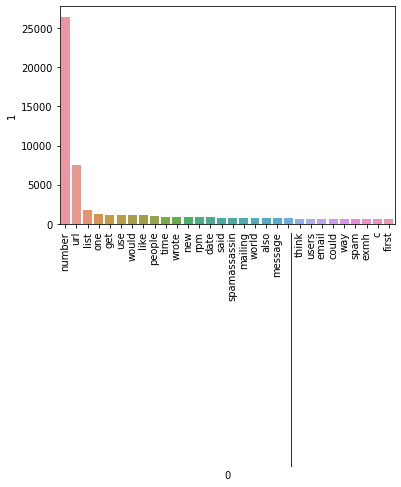

In [15]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1]) 
plt.xticks(rotation='vertical')
plt.show()

In [81]:
wc_ham = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', 
               collocations=False).generate(data[data['label'] == 0]['processed_email'].str.cat(sep=" "))

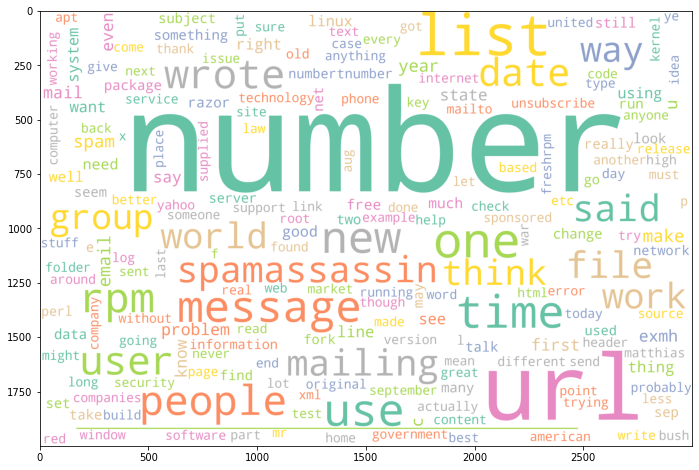

In [82]:
plt.figure(figsize=(15,8))
plt.imshow(wc_ham)

Sentence Analysis

In [83]:
#N-gram

In [84]:
data_spam = data[data['label'] == 1]
data_ham = data[data['label'] == 0]

In [85]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = tqdm(word_vectorizer.fit_transform(data['processed_email']),total=len(data['processed_email']))
frequencies = sum(sparse_matrix).toarray()[0]
print("Done")


Done


In [86]:
n_grams = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by="frequency", ascending=False)
n_grams.describe()
n_grams.head(30)

,frequency
number number,16978
url url,1520
number url,859
mailing list,783
url number,711
url date,638
rpm list,519
sep number,427
url _______________________________________________,377
date number,372


In [87]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = tqdm(word_vectorizer.fit_transform(data_spam['processed_email']),total=len(data_spam['processed_email']))
frequencies = sum(sparse_matrix).toarray()[0]
print("Done")


Done


In [88]:
n_grams_spam = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by="frequency", ascending=False)
n_grams_spam.describe()
n_grams_spam.head(30)

,frequency
number number,3034
hyperlink hyperlink,204
hyperlink click,182
report number,181
number million,104
url url,101
price number,84
email address,84
name address,83
number people,80


In [89]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = tqdm(word_vectorizer.fit_transform(data_ham['processed_email']),total=len(data_ham['processed_email']))
frequencies = sum(sparse_matrix).toarray()[0]
print("Done")


Done


In [90]:
n_grams_ham = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency']).sort_values(by="frequency", ascending=False)
n_grams_ham.describe()
n_grams_ham.head(30)

,frequency
number number,13944
url url,1419
number url,839
mailing list,713
url number,654
url date,637
rpm list,519
sep number,422
url _______________________________________________,370
date number,368


In [91]:
X =  data['email'].values
y = data['label'].values

In [92]:
vectorizer = CountVectorizer()
X_train1 = vectorizer.fit_transform(X.astype('U'))

In [93]:
X_train,X_test,y_train,y_test =  train_test_split(X_train1,y,test_size = 0.3 , random_state = 42 )

Choosing Algo

In [94]:
svc = SVC(probability=True)
score_1 = cross_val_score(svc,X_train,y_train,cv = 10)
score_1.mean()

0.9385372522214628

In [95]:
linear = LinearRegression()
score_2 = cross_val_score(linear,X_train,y_train,cv = 10)
score_2.mean()

-61.14117448627642

Pick SVM

In [96]:
res = svc.fit(X_train, y_train)

In [97]:
labels_pred = res.predict(X_test)

In [98]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(y_test, labels_pred)
precision = precision_score(y_test, labels_pred, average="binary", pos_label=1)
recall = recall_score(y_test, labels_pred, average="binary", pos_label=1)
f1 = f1_score(y_test, labels_pred, average="binary", pos_label=1)
print('Accuracy: %f' % accuracy)
print('Precision: %f' % precision)
print('Recall: %f' % recall)
print('F1 Score: %f' % f1)
print(classification_report(y_test, labels_pred))

Accuracy: 0.936667
Precision: 0.980198
Recall: 0.642857
F1 Score: 0.776471
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       746
           1       0.98      0.64      0.78       154

    accuracy                           0.94       900
   macro avg       0.96      0.82      0.87       900
weighted avg       0.94      0.94      0.93       900



Lime

In [99]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, svc)

In [100]:
print(type(X))

<class 'numpy.ndarray'>


In [101]:
from lime.lime_text import LimeTextExplainer


class_names=['0','1']
explainer = LimeTextExplainer(class_names=class_names)
idx = 30
exp = explainer.explain_instance(X[idx], c.predict_proba, num_features=6)
exp.as_list()

[('the', -0.04961518916272316),
 ('that', -0.041690233358591046),
 ('to', 0.027109174872268816),
 ('is', -0.01829290948597204),
 ('it', -0.016321383872741818),
 ('with', 0.014504079414087979)]

In [102]:
exp.show_in_notebook()